Artificial recurrent neural network LSTM

In [14]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Get Stock

In [15]:
#Get Stock
df = web.DataReader('CHZ-USD',data_source = 'yahoo', start='2012-07-01', end='2022-05-09')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-01,0.017448,0.015258,0.017232,0.017028,1506210.0,0.017028
2019-07-02,0.020266,0.015143,0.017024,0.016336,454670.0,0.016336
2019-07-03,0.016517,0.010733,0.016350,0.012063,246653.0,0.012063
2019-07-04,0.015256,0.011156,0.012066,0.013696,216974.0,0.013696
2019-07-05,0.016383,0.013649,0.013673,0.016059,276543.0,0.016059
...,...,...,...,...,...,...
2022-04-26,0.217845,0.193833,0.212189,0.195858,150508498.0,0.195858
2022-04-27,0.210322,0.194549,0.195870,0.210322,121476464.0,0.210322
2022-04-28,0.210245,0.199980,0.210245,0.202210,125087041.0,0.202210


In [16]:
#Number of rows and columns
df.shape

(1010, 6)

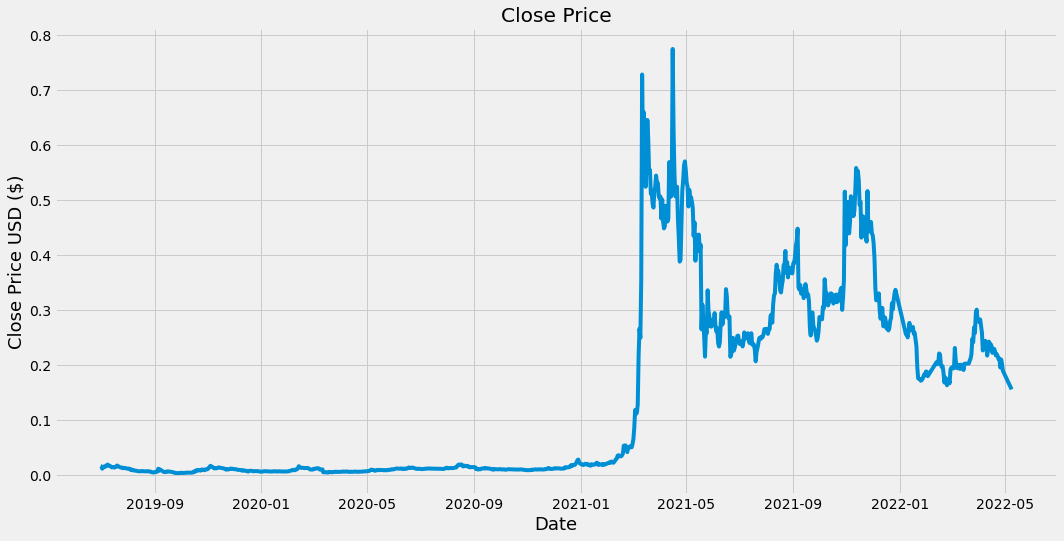

In [17]:
#Visualize  the closing price 
plt.figure(figsize=(16,8))
plt.title('Close Price')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize =18)
plt.ylabel('Close Price USD ($)', fontsize =18)
plt.show()

In [18]:
#Create dataframe with close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

808

In [19]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01675531],
       [0.01585635],
       [0.01030546],
       ...,
       [0.25731826],
       [0.24132032],
       [0.19732039]])

In [20]:
#Create the training data
train_data = scaled_data[0:training_data_len,:]
#Split the data into X_train and Y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):

    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0]) 
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.01675531, 0.01585635, 0.01030546, 0.01242683, 0.01549651,
       0.01536141, 0.01550561, 0.01851294, 0.02001855, 0.01909492,
       0.01660462, 0.01644873, 0.0153783 , 0.01350116, 0.01404027,
       0.01424682, 0.01287241, 0.01485608, 0.01498728, 0.01786211,
       0.01670984, 0.01530555, 0.01400779, 0.01322056, 0.01268145,
       0.01310234, 0.01160452, 0.01175911, 0.01217351, 0.01160452,
       0.01129145, 0.0102587 , 0.01056138, 0.01021193, 0.00828802,
       0.00896483, 0.00666029, 0.00754755, 0.00658495, 0.00562754,
       0.00589514, 0.00556388, 0.00506504, 0.00464934, 0.00412972,
       0.00414921, 0.00442071, 0.00477146, 0.00437784, 0.00470391,
       0.00411023, 0.00418818, 0.00403749, 0.00422975, 0.00471819,
       0.00409594, 0.00380236, 0.00386471, 0.00240846, 0.00210448])]
[0.0019265098834040425]

[array([0.01675531, 0.01585635, 0.01030546, 0.01242683, 0.01549651,
       0.01536141, 0.01550561, 0.01851294, 0.02001855, 0.01909492,
       0.01660462, 0.01644873, 0.

In [21]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [22]:
#Reshape our data
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(748, 60, 1)

In [23]:
from keras.layers import LSTM
from keras.layers import Activation, Dense

In [24]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False ))
model.add(Dense(25))
model.add(Dense(1))

In [25]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [26]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

748/748 [==============================] - 27s 32ms/step - loss: 0.0047


In [27]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [28]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [29]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [30]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [31]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

0.0177189372111075

<ipython-input-32-dcd53dce83b1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


<function matplotlib.pyplot.show(close=None, block=None)>

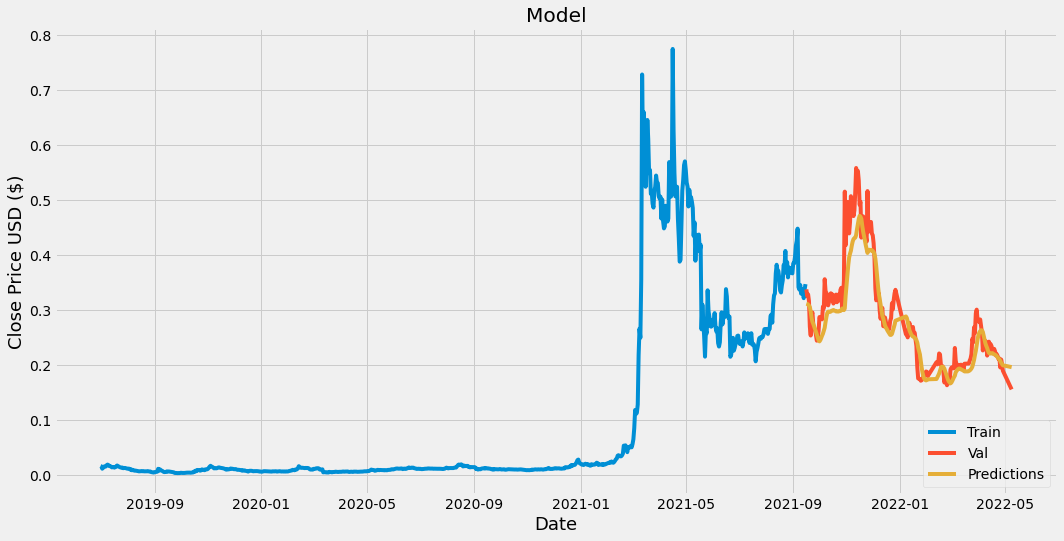

In [32]:
#Plot the data
train =data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions 
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show

In [33]:
#Show the valid and predicted prices 
valid

,Close,Predictions
Date,,
2021-09-16,0.337551,0.311814
2021-09-17,0.325150,0.311332
2021-09-18,0.328581,0.309702
2021-09-19,0.316379,0.308230
2021-09-20,0.269589,0.305571
...,...,...
2022-04-26,0.195858,0.207876
2022-04-27,0.210322,0.204205
2022-04-28,0.202210,0.202000


In [34]:
#Get the quote
chz_quote = web.DataReader('CHZ-USD',data_source = 'yahoo', start='2012-07-01', end='2022-05-09')
#Create a new dataframe
new_df = chz_quote.filter(['Adj Close'])
#Get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days 
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#Undo the scaliing 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[0.1890428]]


In [36]:
#Get the quote
chz_quote = web.DataReader('CHZ-USD',data_source = 'yahoo', start='2022-05-03', end='2022-05-09')
print(chz_quote['Adj Close'])

Date
2022-05-09    0.155976
Name: Adj Close, dtype: float64
